In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Normalization
transform = transforms.Compose([
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to range [-1, 1]
])

#MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

#I divided data
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

# Create DataLoaders for loading rhe data
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=64, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

print("Data prepared and loaded!")


Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 14.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 498kB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.70MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Data prepared and loaded!


In [ ]:
import torch.nn as nn
import torch.optim as optim

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(nn.ReLU()(self.conv1(x)))
        x = self.pool(nn.ReLU()(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7) #for fc it makes it better
        x = nn.ReLU()(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x


model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)


num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()


    model.eval()
    val_loss = 0.0
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}, Loss: {running_loss / len(train_loader):.4f}, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")

    test_accuracy = 100 * correct / total
    print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")

print("Training complete!")


Epoch 1, Loss: 0.3546, Validation Loss: 0.0835, Validation Accuracy: 97.49%
Test Loss: 0.1000, Test Accuracy: 97.49%
Epoch 2, Loss: 0.1414, Validation Loss: 0.0677, Validation Accuracy: 97.94%
Test Loss: 0.0810, Test Accuracy: 97.94%
Epoch 3, Loss: 0.1083, Validation Loss: 0.0540, Validation Accuracy: 98.32%
Test Loss: 0.0647, Test Accuracy: 98.32%
Epoch 4, Loss: 0.0913, Validation Loss: 0.0509, Validation Accuracy: 98.46%
Test Loss: 0.0610, Test Accuracy: 98.46%
Epoch 5, Loss: 0.0772, Validation Loss: 0.0451, Validation Accuracy: 98.51%
Test Loss: 0.0541, Test Accuracy: 98.51%
Epoch 6, Loss: 0.0705, Validation Loss: 0.0388, Validation Accuracy: 98.85%
Test Loss: 0.0465, Test Accuracy: 98.85%
Epoch 7, Loss: 0.0651, Validation Loss: 0.0419, Validation Accuracy: 98.76%
Test Loss: 0.0502, Test Accuracy: 98.76%
Epoch 8, Loss: 0.0611, Validation Loss: 0.0407, Validation Accuracy: 98.82%
Test Loss: 0.0488, Test Accuracy: 98.82%
Epoch 9, Loss: 0.0552, Validation Loss: 0.0412, Validation Accur

In [ ]:
torch.save(model.state_dict(), "mnist_cnn.pth")
print("Model saved!")


Model saved!


<ipython-input-4-6a54a42f8e02>:9: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  custom_model.load_state_dict(torch.load("mnist_cnn.pth"))


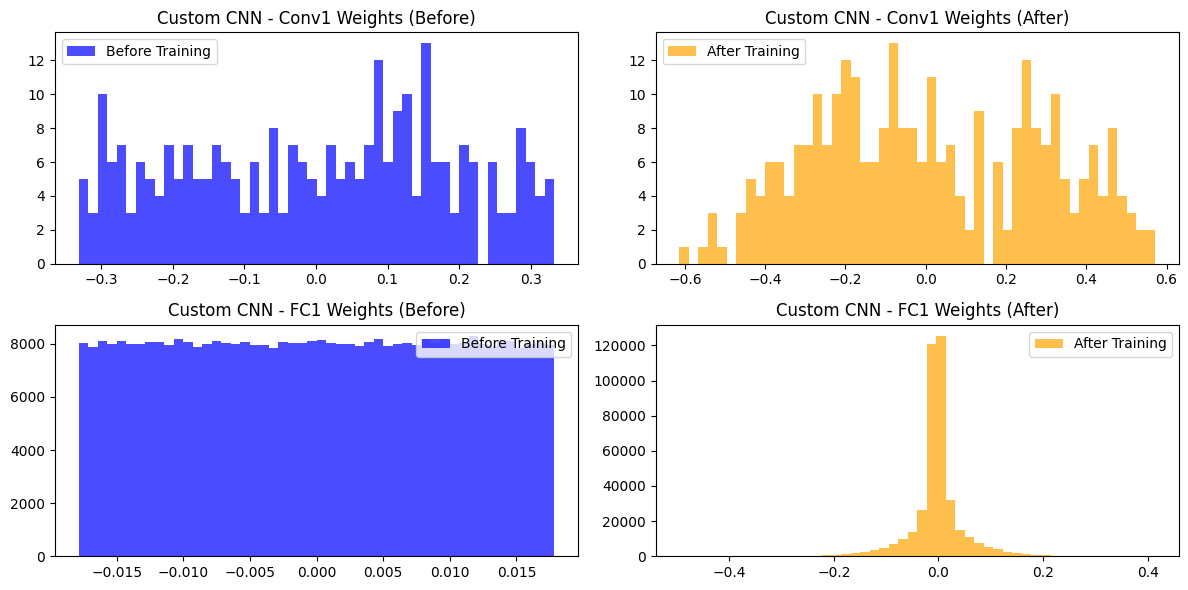

In [ ]:
import matplotlib.pyplot as plt

#CNN before
custom_model = SimpleCNN()
conv1_weights_before = custom_model.conv1.weight.data.numpy().flatten()
fc1_weights_before = custom_model.fc1.weight.data.numpy().flatten()

#CNN after training
custom_model.load_state_dict(torch.load("mnist_cnn.pth"))
conv1_weights_after = custom_model.conv1.weight.data.numpy().flatten()
fc1_weights_after = custom_model.fc1.weight.data.numpy().flatten()


plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.hist(conv1_weights_before, bins=50, color='blue', alpha=0.7, label='Before Training')
plt.title("Custom CNN - Conv1 Weights (Before)")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(conv1_weights_after, bins=50, color='orange', alpha=0.7, label='After Training')
plt.title("Custom CNN - Conv1 Weights (After)")
plt.legend()

plt.subplot(2, 2, 3)
plt.hist(fc1_weights_before, bins=50, color='blue', alpha=0.7, label='Before Training')
plt.title("Custom CNN - FC1 Weights (Before)")
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(fc1_weights_after, bins=50, color='orange', alpha=0.7, label='After Training')
plt.title("Custom CNN - FC1 Weights (After)")
plt.legend()

plt.tight_layout()
plt.show()


# ResNet


In [ ]:
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader


transform = transforms.Compose([
    transforms.Resize((64, 64)),
    transforms.Grayscale(num_output_channels=3),
    transforms.RandomRotation(15),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])


# Load the dataset
train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# divide data
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(train_dataset, [train_size, val_size])

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

print("Data preprocessing complete!")


Data preprocessing complete!


In [ ]:
from torchvision.models import resnet18
import torch.nn as nn
import torch.optim as optim

# Load pre-trained ResNet18
resnet_model = resnet18(pretrained=True)

# Modify grayscale images
resnet_model.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)

# Remove the maxpool
resnet_model.maxpool = nn.Identity()

# make it have 10 outputs
num_features = resnet_model.fc.in_features
resnet_model.fc = nn.Sequential(
    nn.Dropout(0.5),
    nn.Linear(num_features, 256),
    nn.ReLU(),
    nn.Linear(256, 10)
)

print(resnet_model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 192MB/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): Identity()
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), p

In [ ]:
optimizer = optim.Adam(resnet_model.parameters(), lr=1e-4)
criterion = nn.CrossEntropyLoss()


num_epochs = 3
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
resnet_model = resnet_model.to(device)

for epoch in range(num_epochs):
    resnet_model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)


        optimizer.zero_grad()


        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()


    resnet_model.eval()
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = resnet_model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f"Epoch {epoch + 1}, Training Loss: {running_loss / len(train_loader):.4f}, "
          f"Validation Loss: {val_loss / len(val_loader):.4f}, "
          f"Validation Accuracy: {100 * correct / total:.2f}%")



Epoch 1, Training Loss: 0.1174, Validation Loss: 0.0311, Validation Accuracy: 99.08%
Epoch 2, Training Loss: 0.0469, Validation Loss: 0.0359, Validation Accuracy: 98.92%
Epoch 3, Training Loss: 0.0359, Validation Loss: 0.0335, Validation Accuracy: 99.17%


In [ ]:
resnet_model.eval()
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = resnet_model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f"Test Loss: {test_loss / len(test_loader):.4f}, Test Accuracy: {test_accuracy:.2f}%")


Test Loss: 0.0242, Test Accuracy: 99.28%


In [ ]:
torch.save(model.state_dict(), "mnist_ResNet.pth")
print("Model saved!")

Model saved!


<ipython-input-17-d2d0dcf459c9>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  state_dict = torch.load("mnist_ResNet.pth")


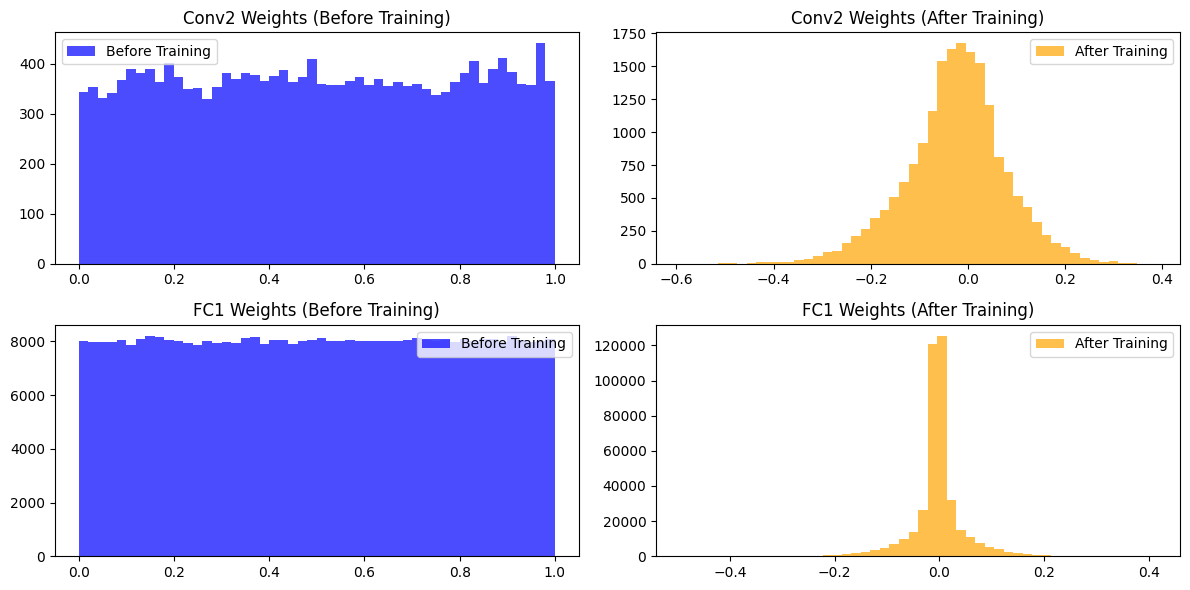

In [ ]:
import torch
import matplotlib.pyplot as plt

state_dict = torch.load("mnist_ResNet.pth")


random_state_dict = {key: torch.rand_like(value) for key, value in state_dict.items()}
conv2_weights_before = random_state_dict["conv2.weight"].cpu().numpy().flatten()
fc1_weights_before = random_state_dict["fc1.weight"].cpu().numpy().flatten()

# Extract weights after training
conv2_weights_after = state_dict["conv2.weight"].cpu().numpy().flatten()
fc1_weights_after = state_dict["fc1.weight"].cpu().numpy().flatten()

# Plot before and after weight
plt.figure(figsize=(12, 6))

# Conv2
plt.subplot(2, 2, 1)
plt.hist(conv2_weights_before, bins=50, color='blue', alpha=0.7, label='Before Training')
plt.title("Conv2 Weights (Before Training)")
plt.legend()

plt.subplot(2, 2, 2)
plt.hist(conv2_weights_after, bins=50, color='orange', alpha=0.7, label='After Training')
plt.title("Conv2 Weights (After Training)")
plt.legend()

# FC1
plt.subplot(2, 2, 3)
plt.hist(fc1_weights_before, bins=50, color='blue', alpha=0.7, label='Before Training')
plt.title("FC1 Weights (Before Training)")
plt.legend()

plt.subplot(2, 2, 4)
plt.hist(fc1_weights_after, bins=50, color='orange', alpha=0.7, label='After Training')
plt.title("FC1 Weights (After Training)")
plt.legend()

plt.tight_layout()
plt.show()
